# TP 1 Mesures de performance
Dans ce TP, nous aimerions avoir un premier aperçu sur les algorithmes d'apprentissage automatique. Plus précisément, nous aimerions évaluer leurs performances en utilisant les métriques suivantes:
- Matrice de conusion
- Rappel
- Précision
- Taux de FP
- Spécificité
- Courbe ROC

Les mesures devront être calculées sur la tâche de classification de nombres manuscrits.

Le travail consiste à implementer ces métriques et à les comparer avec les métriques des librairies disponibles.

Les algorithmes : K plus Proches Voisins devront être implementés.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier #machine leraning 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
     

In [2]:
# Pour RNC
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [3]:
# données
X = np.genfromtxt('Social_Network_Ads.csv', delimiter=',', dtype=int)
print(X.shape)
df = pd.read_csv("Social_Network_Ads.csv",nrows=5000)

(401, 5)


In [4]:

df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
X = df.drop(['Purchased', 'User ID', 'Gender'],  axis = 1)
Y = df['Purchased']
X
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [6]:
import pandas as pd
df_labels = Y
# Sauvegarder les labels dans un fichier CSV
df_labels.to_csv("labels.csv", index=False)
print(df_labels.head())
print(df_labels.shape)



0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64
(400,)


In [7]:
print(type(df_labels))  # Vérifier le type
print(df_labels.head()) # Vérifier les premières valeurs

<class 'pandas.core.series.Series'>
0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


In [8]:
labels_counts = df_labels.value_counts()
print(labels_counts)


Purchased
0    257
1    143
Name: count, dtype: int64


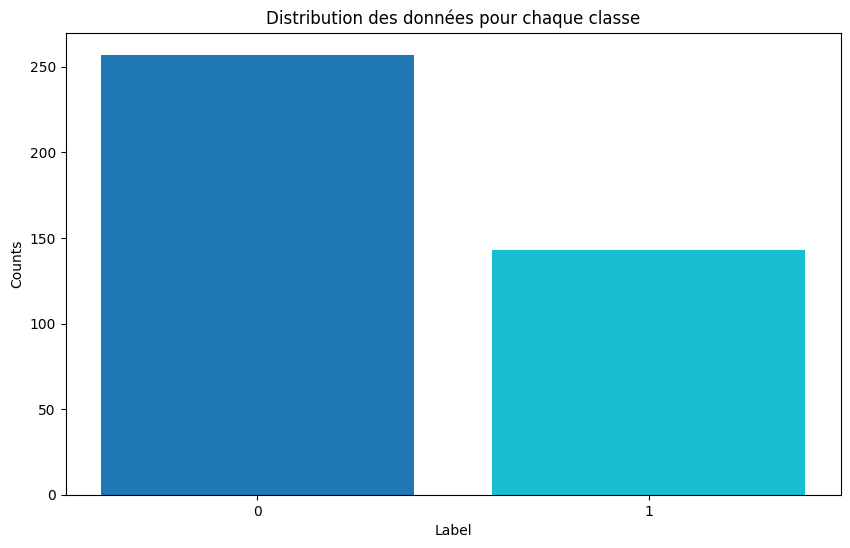

In [9]:
# Calcul des fréquences pour chaque classe et tri par ordre croissant des classes
labels_counts = df_labels.value_counts().sort_index()

# Génération d'une palette de 10 couleurs à partir de la colormap 'tab10'
colors = plt.cm.tab10(np.linspace(0, 1, len(labels_counts)))

# Création du graphique en barres avec des couleurs différentes pour chaque barre
plt.figure(figsize=(10, 6))
plt.bar(labels_counts.index, labels_counts.values, color=colors)
plt.xlabel('Label')
plt.ylabel("Counts")
plt.title('Distribution des données pour chaque classe')
plt.xticks(labels_counts.index)
plt.show()

Purchased
0    257
1    143
Name: count, dtype: int64


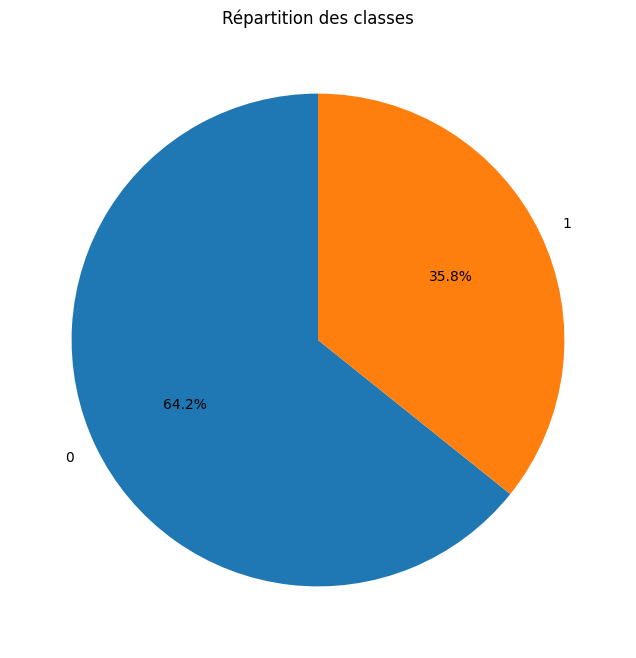

In [10]:

# Comptage des étiquettes uniques
labels_counts = df_labels.value_counts()
print(labels_counts)

# Création du diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(labels_counts, labels=labels_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Répartition des classes")
plt.show()


Afficher aléatoirement quelques données de notre base

Notons que l'étiquette 10 concerne le chiffre 0. L'étiquette a été utilisée ainsi afin de faciliter les calculs conséquents.

# Implémentation des métriques demandées
Ici il faut écrire les fonctions, puis les appeler dans la suite du code

- Matrice de confusion :

In [11]:
def confusion_matrix_imp(actual, predicted, labels=None):

    # Vérifie si des libellés sont fournis en entrée
    if labels is None:
        # Si aucun libellé n'est fourni, extrait les libellés uniques à partir des étiquettes réelles et prédites
        labels = np.unique(np.concatenate((actual, predicted)))
        #Fusionne actual et predicted en un seul tableau.
        #Trouve toutes les classes uniques présentes dans les données.
    # Obtient le nombre total de libellés uniques
    num_labels = len(labels)  # Nombre total de classes
    

    matrix = np.zeros((num_labels, num_labels), dtype=int) #Crée une matrice de confusion[num_labels][num_labels ]carrée remplie de 0.

  
    label_to_index = {label: i for i, label in enumerate(labels)} #Convertit chaque classe en un index unique pour accéder à la matrice.

    # Parcourt chaque paire d'étiquettes réelles et prédites pour incrémenter les compteurs dans la matrice de confusion
    for a, p in zip(actual, predicted): # Parcourt les paires (réel, prédit)
       
        actual_index = label_to_index[a]   # Trouve l'index de la vraie classe
        predicted_index = label_to_index[p] # Trouve l'index de la classe prédite
       
        # Incrémente le compteur correspondant dans la matrice de confusion
        matrix[actual_index][predicted_index] += 1
        # Exemple avec actual = [0, 1, 2] et predicted = [0, 0, 2] :

        #(0, 0) → matrix[0][0] += 1
        #(1, 0) → matrix[1][0] += 1
        #(2, 2) → matrix[2][2] += 1

    # Retourne la matrice de confusion calculée
    return matrix 



In [12]:

def plot_confusion_matrix(conf_matrix, labels, title="Matrice de Confusion"):
    plt.figure(figsize=(9, 7))  # Ajuster la taille du graphique
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=labels, yticklabels=labels, linewidths=1, linecolor='black')

    # Personnalisation des axes et du titre
    plt.xlabel("Valeurs Prédites", fontsize=12, fontweight='bold')
    plt.ylabel("Valeurs Réelles", fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')

    # Amélioration des étiquettes des axes
    plt.xticks(fontsize=10, rotation=0)
    plt.yticks(fontsize=10, rotation=0)

    plt.show()




- Accuracy = (TP + TN)/(TP + TN + FP + FN)

In [13]:
import numpy as np

def accuracy_score_imp(y_true, y_pred):
  
    y_true = np.array(y_true)  # Convertit en tableau NumPy si ce n'est pas déjà le cas
    y_pred = np.array(y_pred)

    return np.mean(y_true == y_pred)  # Moyenne des cas où y_true == y_pred
#exemple:

#y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]  # Valeurs réelles
#y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 1]  # Prédictions du modèle
          #1  1  1  0  1  1   0  1  1 1
#accuracy =8 /10

- Recall (True Positive Rate) = TP/(TP + FN)

In [14]:

def recall_score_imp(actual, predicted):

    labels = np.unique(actual)  # Trouver toutes les classes uniques
    num_classes = len(labels)  # Nombre total de classes
    total_recall = 0
   # Boucle à travers chaque classe
    for label in labels:
        # incrémente le nombre de vrais positifs
        true_positives = np.sum((actual == label) & (predicted == label))
        # Sinon, incrémente le nombre de faux négatifs
        false_negatives = np.sum((actual == label) & (predicted != label))
        # Calcul du rappel pour la classe actuelle
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
        # Ajout du rappel de la classe actuelle au rappel total
        #ici on peut afficher recal de chque classe print("recall de laclasse:",lable,recall)

        # Affichage du recall par classe
        print(f"Recall de la classe {label}: {recall:.2f}")

        total_recall += recall

    return total_recall / num_classes  # Moyenne du recall sur toutes les classes
#exemple
# Exemple d'utilisation
#y_true = np.array([1, 0, 1, 2, 0, 1, 2, 2, 1, 0])  # Valeurs réelles
#y_pred = np.array([1, 0, 1, 0, 0, 1, 2, 2, 2, 0])  # Prédictions
#Classe FN (False Negatives) TP (True Positives)  	Recall 
# 0               0                3                3/(3+0) = 1.00
# 1               3                1               1/(3+1) = 0.75
# 2               2                1               1/(2+1) = 0.67
#Recall moyen = Recall moyen = 1.00+0.75+0.67/3=0.81=0.81 (≈ 81%)

In [15]:

def recall_score_classe(y_true, y_pred, labels):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    recalls = []  # Stocke le   recall de chaque classe

   # Boucle à travers chaque classe
    for label in labels:
        # incrémente le nombre de vrais positifs
        true_positives = np.sum((y_true == label) & (y_pred == label))
        # Sinon, incrémente le nombre de faux négatifs
        false_negatives = np.sum((y_true == label) & (y_pred != label))
        # Calcul du rappel pour la classe actuelle

        recall_classe = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

        # Ajout du rappel de la classe actuelle au rappel total
        #ici on peut afficher recal de chque classe print("recall de laclasse:",lable,recall)
        recalls.append(recall_classe)

    return recalls  # Moyenne du recall sur toutes les classes


- Précision = TP/(TP + FP)

In [16]:
import numpy as np

def precision_score_imp(y_true, y_pred, labels):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    precisions = []  # Stocke la précision de chaque classe

    for label in labels:
        # Calcul des vrais positifs (TP) et faux positifs (FP) pour chaque classe
        true_positives = np.sum((y_pred == label) & (y_true == label))
        false_positives = np.sum((y_pred == label) & (y_true != label))

        # Calcul de la précision pour la classe actuelle
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
         # Affichage du score de précision pour chaque classe
        print(f"Précision de la classe {label}: {precision:.2f}")
        precisions.append(precision)  # Ajout de la précision de la classe

    return np.mean(precisions)  # Moyenne des précisions par classe
# Exemple d'utilisation
#y_true = np.array([1, 0, 1, 2, 0, 1, 2, 2, 1, 0])  # Valeurs réelles
#y_pred = np.array([1, 0, 1, 0, 0, 1, 2, 2, 2, 0])  # Prédictions
#Classe FN ( false_positives) TP (True Positives)  	precision
# 0               1                3                3/(3+1) = 0.75
# 1               0                3               3/(3+0) = 1
# 2               1                2               2/(2+1) = 0.67
#precision moyen = precision moyen = 1.00+0.75+0.67/3==0.80 (≈ 80%)

- Taux de FP (False Positive Rate) = FP / (FP + TN)

In [17]:
def false_positive_rate_sklearn(y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        fp = np.sum(cm, axis=0) - np.diag(cm)
        tn = np.sum(cm) - (np.sum(cm, axis=0) - np.diag(cm) + np.sum(cm, axis=1) - np.diag(cm))
        fpr = fp / (fp + tn)
        return np.mean(fpr)

In [18]:
import numpy as np

def false_positive_rate_imp(y_true, y_pred, labels):    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    false_positive_rates = []  # Stocke le FPR de chaque classe

    for label in labels:
        # Calcul des faux positifs (FP) et vrais négatifs (TN) pour chaque classe
        false_positives = np.sum((y_pred == label) & (y_true != label))
        true_negatives = np.sum((y_pred != label) & (y_true != label))

        # Évite la division par zéro
        fpr = false_positives / (false_positives + true_negatives) if (false_positives + true_negatives) > 0 else 0

        # Affichage du false_positive_rate pour chaque classe
        print(f"false positive rate de la classe {label}: {fpr:.2f}")

        false_positive_rates.append(fpr)  # Ajout du FPR de la classe

    return np.mean(false_positive_rates)  # Moyenne des FPR par classe
# Exemple d'utilisation
#y_true = np.array([1, 0, 1, 2, 0, 1, 2, 2, 1, 0])  # Valeurs réelles
#y_pred = np.array([1, 0, 1, 0, 0, 1, 2, 2, 2, 0])  # Prédictions
#Classe FN ( false_positives) TP (True Positives)  	false_positive_rate
# 0               1                3                1/(3+1) = 0.25
# 1               0                3               0/(3+0) = 0
# 2               1                2               1/(2+1) = 0.33
#precision moyen = precision moyen = 0.25+0+0.33/3==0.19 (≈ 19%)

In [19]:

def false_positive_rate_classe(y_true, y_pred, labels):    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    false_positive_rates = []  # Stocke le FPR de chaque classe

    for label in labels:
        # Calcul des faux positifs (FP) et vrais négatifs (TN) pour chaque classe
        false_positives = np.sum((y_pred == label) & (y_true != label))
        true_negatives = np.sum((y_pred != label) & (y_true != label))

        # Évite la division par zéro
        fpr = false_positives / (false_positives + true_negatives) if (false_positives + true_negatives) > 0 else 0


        false_positive_rates.append(fpr)  # Ajout du FPR de la classe

    return false_positive_rates  # Moyenne des FPR par classe

- Spécificité (True Negative Rate) = TN / (TN + FP)

In [20]:
def specificity_score_sklearn(y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        tn = np.sum(cm) - (np.sum(cm, axis=0) - np.diag(cm) + np.sum(cm, axis=1) - np.diag(cm))  # Total - (FP + FN + TP)
        fp = np.sum(cm, axis=0) - np.diag(cm)
        specificity = tn / (tn + fp)
        return np.mean(specificity)

In [21]:
import numpy as np

def specificity_score_imp(y_true, y_pred, labels):
   
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    specificities = []  # Stocke la spécificité de chaque classe

    for label in labels:
        # Calcul des vrais négatifs (TN) et des faux positifs (FP) pour chaque classe
        true_negatives = np.sum((y_true != label) & (y_pred != label))
        false_positives = np.sum((y_true != label) & (y_pred == label))

        # Évite la division par zéro
        specificity = true_negatives / (true_negatives + false_positives) if (true_negatives + false_positives) > 0 else 0

        
        # Affichage du specificity  pour chaque classe
        print(f"specificity  de la classe {label}: {specificity :.2f}")
        
        specificities.append(specificity)  # Ajout de la spécificité de la classe

    return np.mean(specificities)  # Moyenne des spécificités par classe
# Exemple d'utilisation
#y_true = np.array([1, 0, 1, 2, 0, 1, 2, 2, 1, 0])  # Valeurs réelles
#y_pred = np.array([1, 0, 1, 0, 0, 1, 2, 2, 2, 0])  # Prédictions
#Classe FN ( false_positives) TN (True Negatives)  	specificity
# 0               1                6                6/(6+1) = 0.86
# 1               0                6               6/(6+0) = 1
# 2               1                7               7/(7+1) = 0.875
#specificity  moyen = specificity  moyen = 0.25+0+0.33/3==0.91 (≈ 91%)

- Courbe ROC

In [ ]:
def roc_curve_imp(y_true, y_scores):
    thresholds = np.sort(np.unique(y_scores))[::-1]
    tpr = []
    fpr = []
    
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        cm = confusion_matrix(y_true, y_pred)
        TP = cm[1, 1]
        FN = cm[1, 0]
        FP = cm[0, 1]
        TN = cm[0, 0]
        
        tpr.append(TP / (TP + FN))
        fpr.append(FP / (FP + TN))
    
    return np.array(fpr), np.array(tpr)
def auc_imp(fpr, tpr):
    return np.trapz(tpr, fpr)

# Classification

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

In [23]:
"""Données brutes X :
Avant normalisation, les valeurs sont entre 1 et 100 :
 [[52 93 15]
 [72 61 21]
 [83 87 75]
 [75 88 100]]

StandardScaler() est une classe de sklearn.preprocessing qui sert à normaliser les données.
Il transforme les features en ayant une moyenne = 0 et un écart-type = 1.
Cela est utile pour que les modèles ML ne soient pas influencés par des variables avec des échelles différentes."""
scaler = StandardScaler()

scaler.fit(X)
"""fit(X) permet de calculer la moyenne et l'écart-type de chaque colonne de X.
X représente les features (variables explicatives) du dataset."""


scaled_features = scaler.transform(X)


"""transform(X) applique la transformation pour centrer et réduire les valeurs de X.

Cela revient à appliquer la formule suivante sur chaque valeur 
x scaled = x-μ/alpha
μ = Moyenne de la colonne
alpha = Écart-type de la colonne
Après cette étape, scaled_features contient les valeurs de X normalisées.



Données normalisées :
 [[ 0.15058913  0.96999488 -1.01447158]
 [ 0.93618248  0.12519714 -0.79825416]
 [ 1.40035129  0.66062506  0.7126549 ]
 [ 1.05823234  0.69428223  1.45163158]]"""


Xt, Xtt, Yt, Ytt = train_test_split(
      scaled_features, Y, test_size = 0.30)


"""Données d'entraînement (Xt) :
 [[-1.62353198 -1.13109869  1.02232582]
 [ 1.05823234  0.69428223  1.45163158]
 [ 1.40035129  0.66062506  0.7126549 ]]

Données de test (Xtt) :
 [ 0.69208276 -1.09153669  0.25506139]
"""

"Données d'entraînement (Xt) :\n [[-1.62353198 -1.13109869  1.02232582]\n [ 1.05823234  0.69428223  1.45163158]\n [ 1.40035129  0.66062506  0.7126549 ]]\n\nDonnées de test (Xtt) :\n [ 0.69208276 -1.09153669  0.25506139]\n"

# Méthode 0: K- Plus Proches Voisins

Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

In [24]:
from sklearn.neighbors import KNeighborsClassifier
# def euclidean_distance(point1, point2):
#     # Calculate the Euclidean distance between two points
#     return np.sqrt(np.sum((point1 - point2)**2))

# def k_nearest_neighbors(X_train, y_train, X_test, k):
#     predictions = []
#     for test_point in X_test:
#         # Calculate distances between the test point and all points in the training set
#         distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
#         # Get indices of k nearest neighbors
#         nearest_indices = np.argsort(distances)[:k]
#         # Get labels of k nearest neighbors
#         nearest_labels = [y_train[i] for i in nearest_indices]
#         # Predict the label based on majority vote
#         predicted_label = max(set(nearest_labels), key=nearest_labels.count)
#         predictions.append(predicted_label)
#     return predictions


# knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model with the training data

------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------
K = 1:


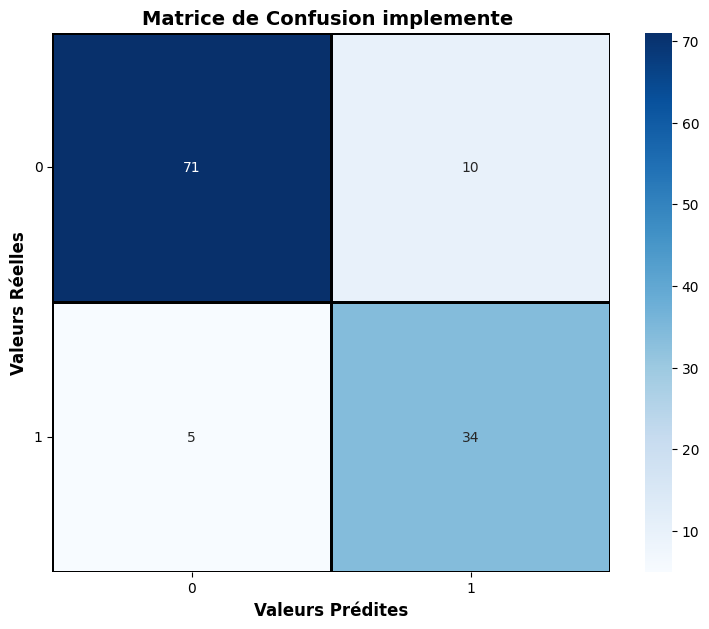

Recall de la classe 0: 0.88
Recall de la classe 1: 0.87
Précision de la classe 0: 0.93
Précision de la classe 1: 0.77
false positive rate de la classe 0: 0.13
false positive rate de la classe 1: 0.12
specificity  de la classe 0: 0.87
specificity  de la classe 1: 0.88
[[71 10]
 [ 5 34]]
Accuracy: 0.875
Recall: 0.8741690408357075
Precision: 0.8534688995215312
False Positive Rate: 0.1258309591642925
Specificity: 0.8741690408357075
------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------
K = 1:


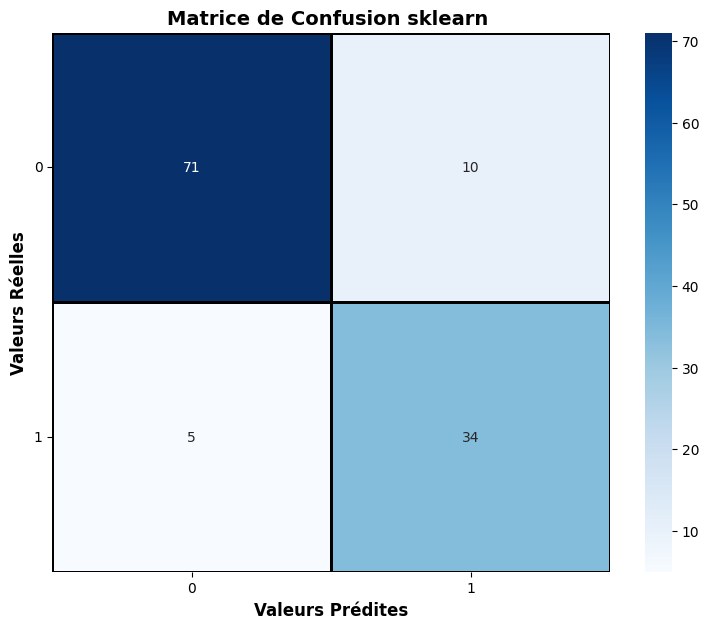

[[71 10]
 [ 5 34]]
Accuracy sklearn: 0.875
Recall  sklearn: 0.8741690408357075
Precision  sklearn: 0.8534688995215312
False Positive Rate  sklearn: 0.06620553359683795
Specificity  sklearn: 0.9337944664031621
-------------------- Courbe ROC sklearn pour classification binaire --------------------


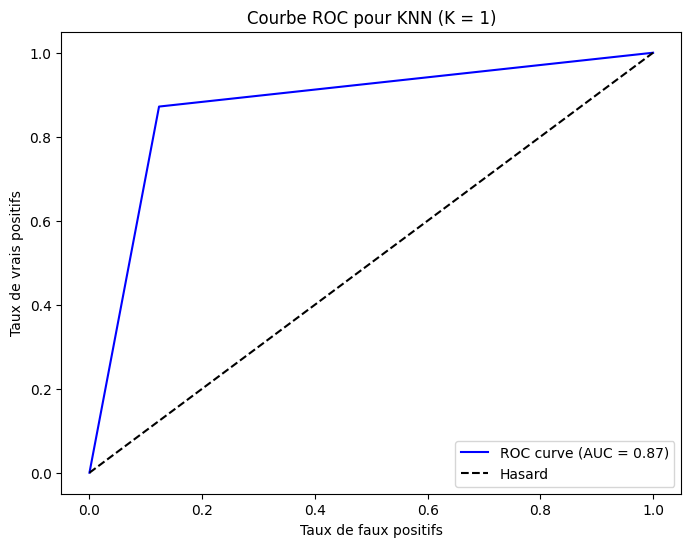

------------------------------------------------Courbe ROC implemente----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_5512\2404480383.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)


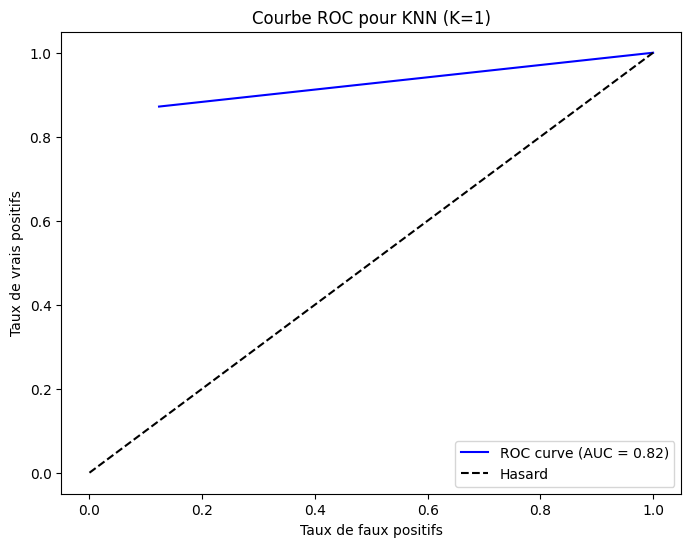

------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------
K = 3:


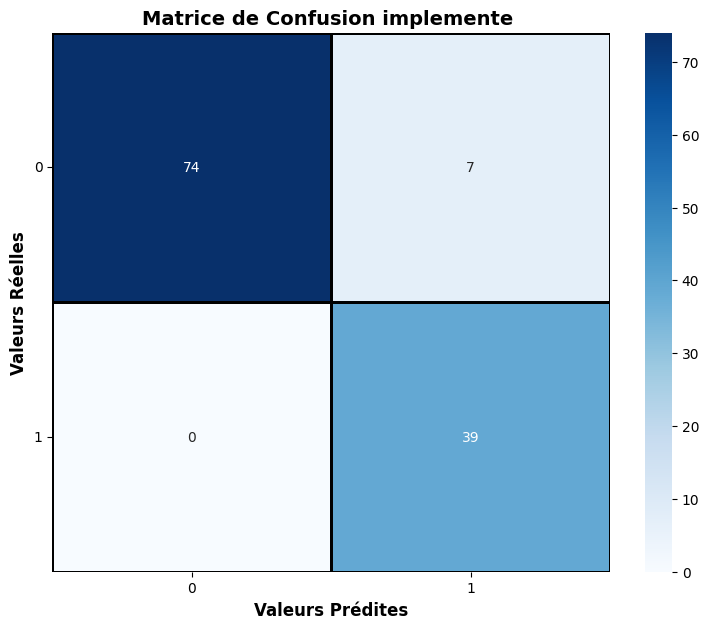

Recall de la classe 0: 0.91
Recall de la classe 1: 1.00
Précision de la classe 0: 1.00
Précision de la classe 1: 0.85
false positive rate de la classe 0: 0.00
false positive rate de la classe 1: 0.09
specificity  de la classe 0: 1.00
specificity  de la classe 1: 0.91
[[74  7]
 [ 0 39]]
Accuracy: 0.9416666666666667
Recall: 0.9567901234567902
Precision: 0.9239130434782609
False Positive Rate: 0.043209876543209874
Specificity: 0.9567901234567902
------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------
K = 3:


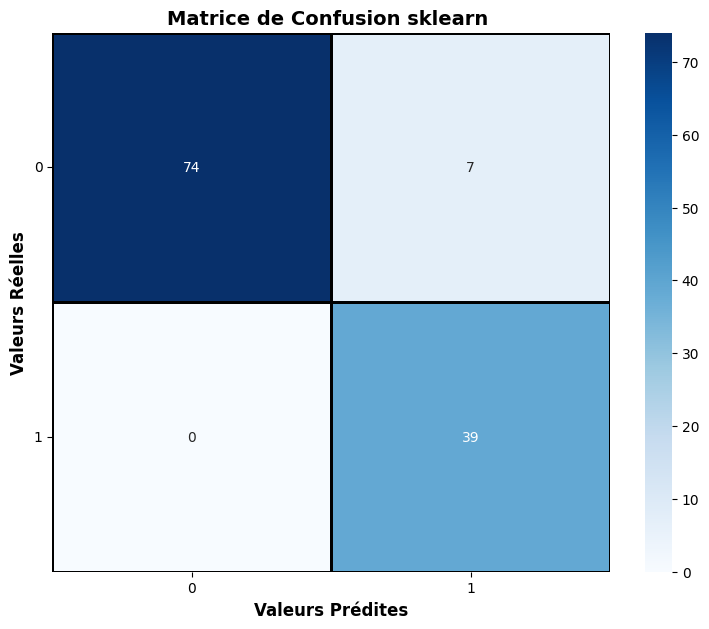

[[74  7]
 [ 0 39]]
Accuracy sklearn: 0.9416666666666667
Recall  sklearn: 0.9567901234567902
Precision  sklearn: 0.9239130434782609
False Positive Rate  sklearn: 0.029166666666666667
Specificity  sklearn: 0.9708333333333333
-------------------- Courbe ROC sklearn pour classification binaire --------------------


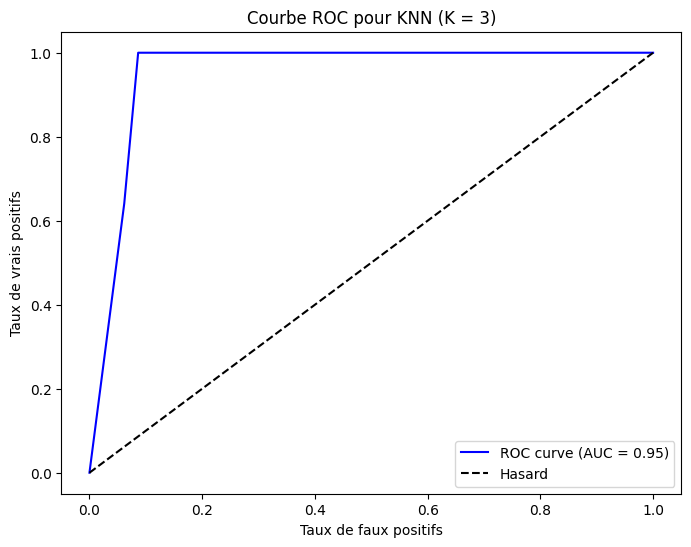

------------------------------------------------Courbe ROC implemente----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_5512\2404480383.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)


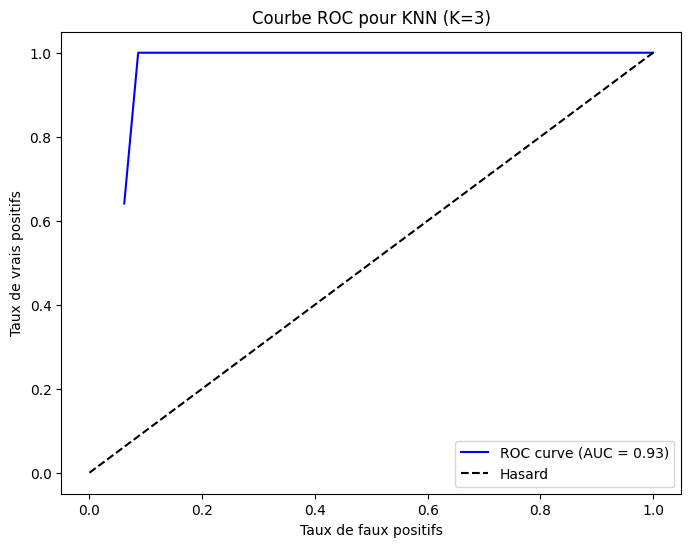

------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------
K = 5:


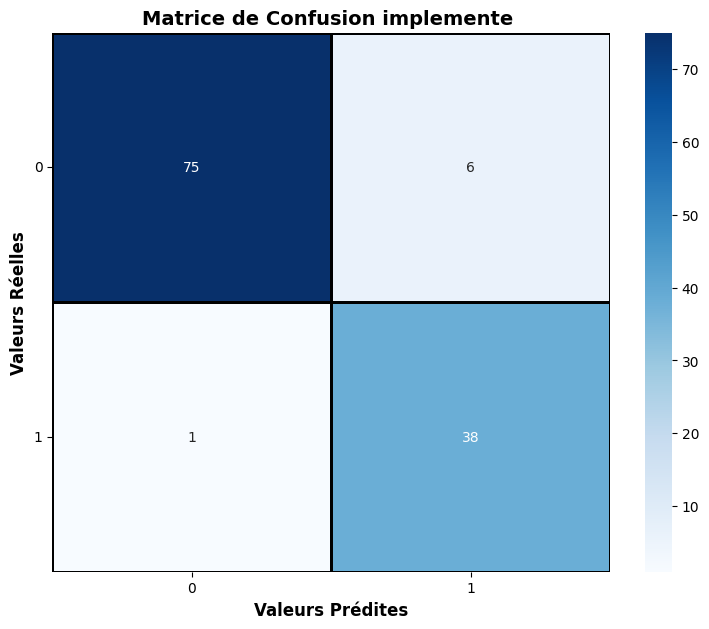

Recall de la classe 0: 0.93
Recall de la classe 1: 0.97
Précision de la classe 0: 0.99
Précision de la classe 1: 0.86
false positive rate de la classe 0: 0.03
false positive rate de la classe 1: 0.07
specificity  de la classe 0: 0.97
specificity  de la classe 1: 0.93
[[75  6]
 [ 1 38]]
Accuracy: 0.9416666666666667
Recall: 0.9501424501424501
Precision: 0.9252392344497608
False Positive Rate: 0.04985754985754985
Specificity: 0.9501424501424501
------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------
K = 5:


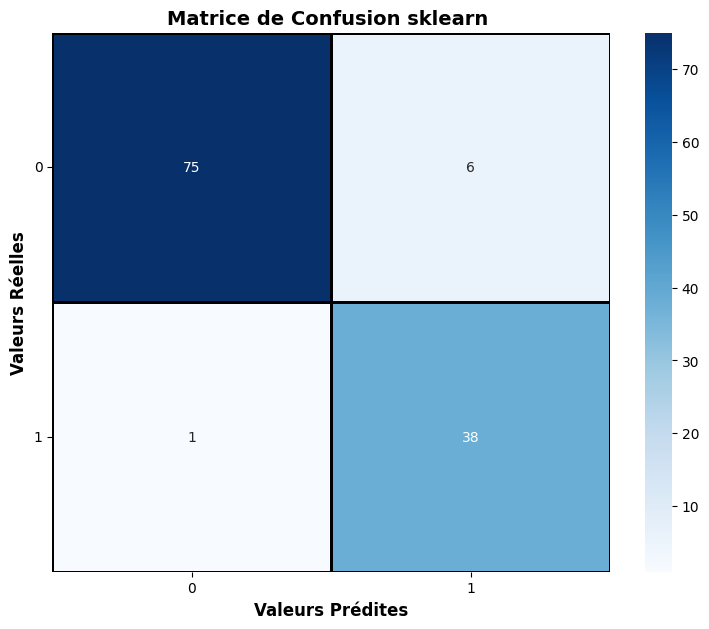

[[75  6]
 [ 1 38]]
Accuracy sklearn: 0.9416666666666667
Recall  sklearn: 0.9501424501424501
Precision  sklearn: 0.9252392344497608
False Positive Rate  sklearn: 0.029596048945894148
Specificity  sklearn: 0.9704039510541058
-------------------- Courbe ROC sklearn pour classification binaire --------------------


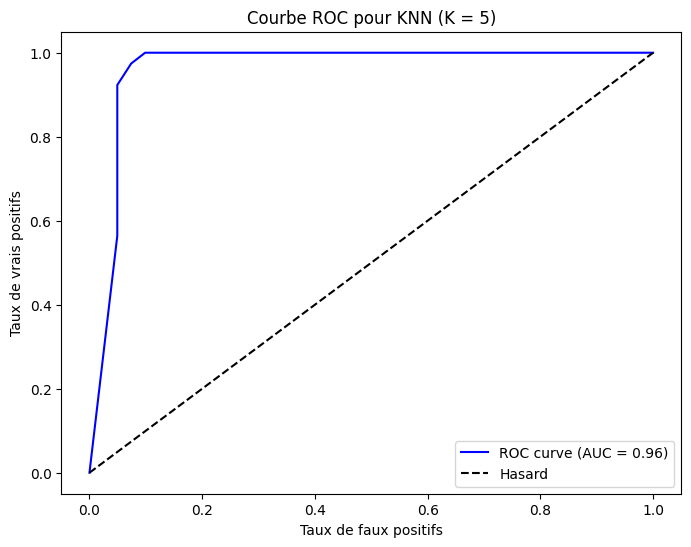

------------------------------------------------Courbe ROC implemente----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_5512\2404480383.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)


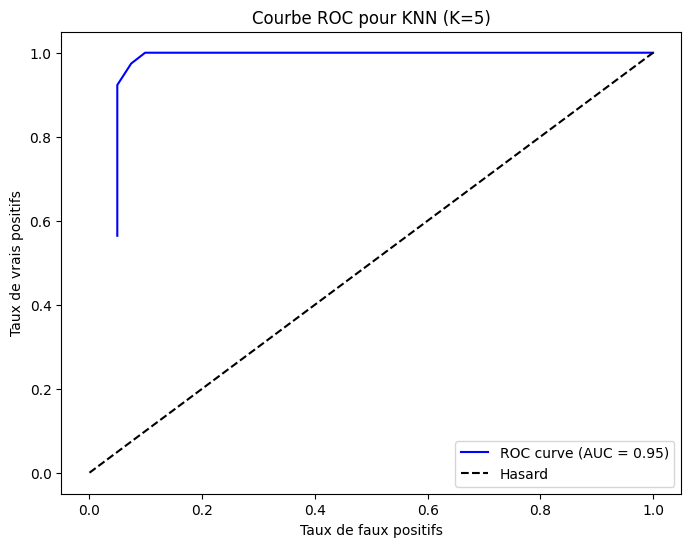

------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------
K = 7:


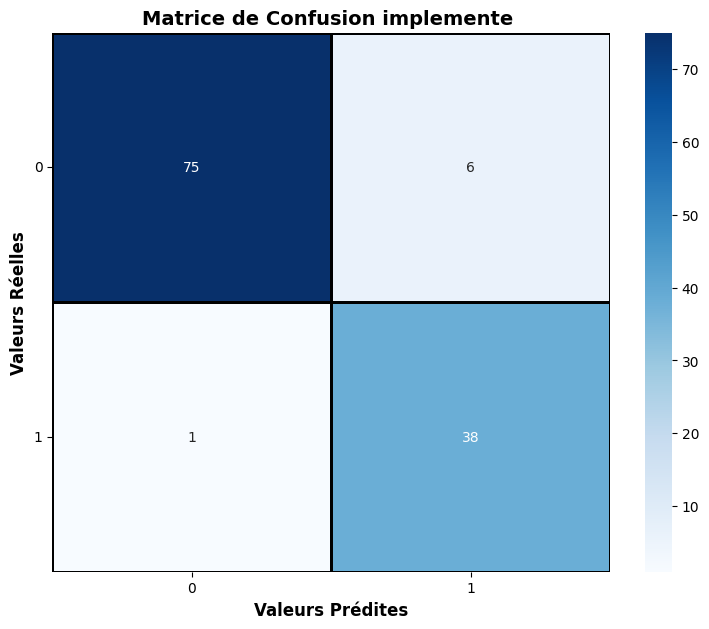

Recall de la classe 0: 0.93
Recall de la classe 1: 0.97
Précision de la classe 0: 0.99
Précision de la classe 1: 0.86
false positive rate de la classe 0: 0.03
false positive rate de la classe 1: 0.07
specificity  de la classe 0: 0.97
specificity  de la classe 1: 0.93
[[75  6]
 [ 1 38]]
Accuracy: 0.9416666666666667
Recall: 0.9501424501424501
Precision: 0.9252392344497608
False Positive Rate: 0.04985754985754985
Specificity: 0.9501424501424501
------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------
K = 7:


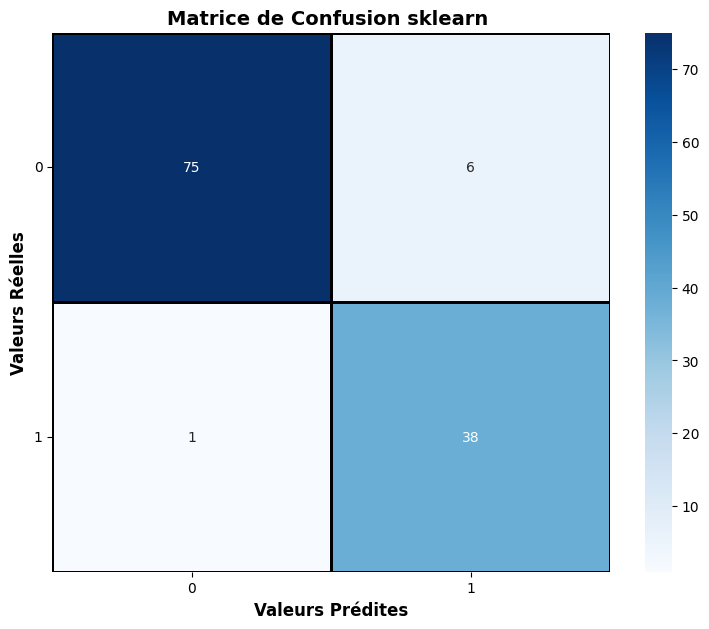

[[75  6]
 [ 1 38]]
Accuracy sklearn: 0.9416666666666667
Recall  sklearn: 0.9501424501424501
Precision  sklearn: 0.9252392344497608
False Positive Rate  sklearn: 0.029596048945894148
Specificity  sklearn: 0.9704039510541058
-------------------- Courbe ROC sklearn pour classification binaire --------------------


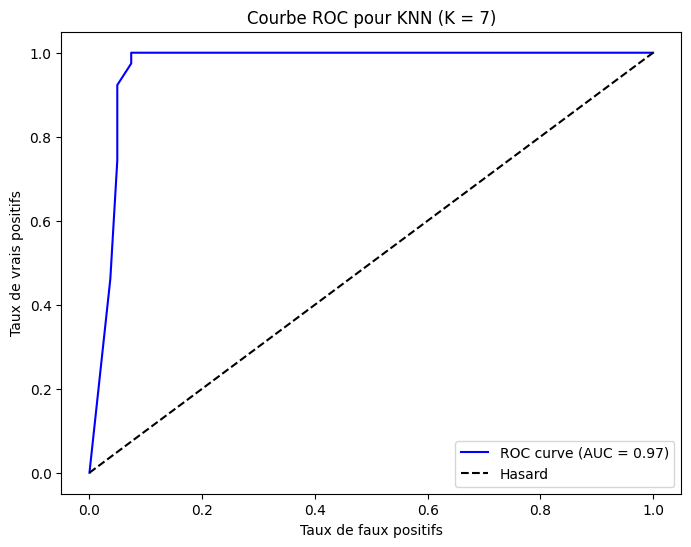

------------------------------------------------Courbe ROC implemente----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_5512\2404480383.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)


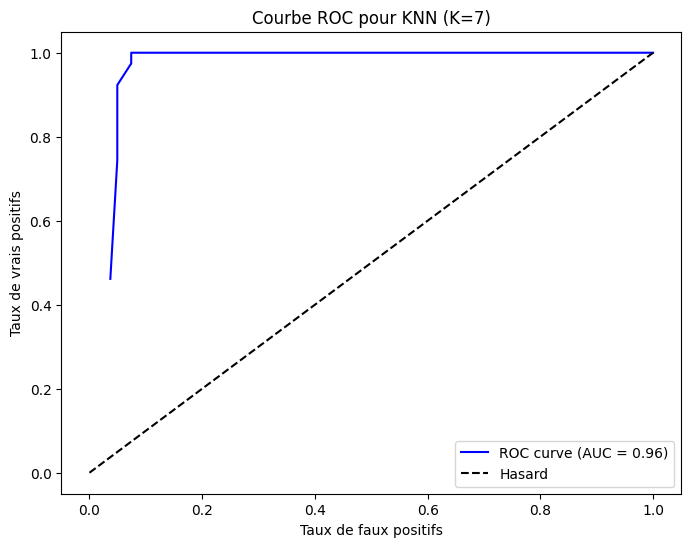

In [34]:

# Méthode 0: K- Plus Proches Voisins
# Tester différentes valeurs de K et évaluer les performances du modèle
K_values = [1,3,5,7]  # Valeurs de K à tester
for k in K_values:
    # Prédire les étiquettes pour les données de test
#     y_pred = k_nearest_neighbors(Xt, Yt, Xtt, k)
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(Xt, Yt)
    y_pred = knn_model.predict(Xtt)
    # Calculer les métriques de performance
#     conf_matrix = confusion_matrix(Ytt, y_pred, num_classes=10)
     # Afficher les résultats
    print("------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------")
    print(f"K = {k}:")
    conf_matrix_imp = confusion_matrix_imp(Ytt, y_pred)

    labels = [0,1]
    plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion implemente ")


    acc = accuracy_score_imp(Ytt, y_pred)
   
    recall = recall_score_imp(Ytt, y_pred)
 
    
    precision = precision_score_imp(Ytt, y_pred,labels)  # Étiquette positive pour le chiffre 0

    
    fpr = false_positive_rate_imp(Ytt, y_pred, labels)  # Étiquette positive pour le chiffre 0
    specificity = specificity_score_imp(Ytt, y_pred, labels)  # Étiquette négative pour le chiffre 0
#     roc_fpr, roc_tpr = roc_curve(Ytt, y_pred, positive_label=10)  # Étiquette positive pour le chiffre 0
    
   
    
    print(conf_matrix_imp)
    print(f"Accuracy: {acc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"False Positive Rate: {fpr}")
    print(f"Specificity: {specificity}")

   
    print("------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------")
    print(f"K = {k}:")
    conf_matrix = confusion_matrix(Ytt, y_pred)
    plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion sklearn ")
    
    accuracy_sklearn = accuracy_score(Ytt, y_pred)
    precision_sklearn = precision_score(Ytt, y_pred,average="macro")  # Étiquette positive pour le chiffre 0
    recall_sklearn = recall_score(Ytt, y_pred,average="macro")

    fpr_sklearn  = false_positive_rate_sklearn(Ytt, y_pred)  # Étiquette positive pour le chiffre 0

    specificity_sklearn  = specificity_score_sklearn(Ytt, y_pred)  # Étiquette négative pour le chiffre 0"""
    print(conf_matrix)

    print(f"Accuracy sklearn: { accuracy_sklearn}")
    print(f"Recall  sklearn: {recall_sklearn}")
    print(f"Precision  sklearn: {precision_sklearn}")
    print(f"False Positive Rate  sklearn: {fpr_sklearn}")
    print(f"Specificity  sklearn: {specificity_sklearn}")

    print("-------------------- Courbe ROC sklearn pour classification binaire --------------------")

    # Prédiction des probabilités pour la classe positive (classe 1)
    y_score = knn_model.predict_proba(Xtt)[:, 1]  # On ne garde que la colonne pour la classe 1

    # Binarisation des étiquettes (Ytt doit être binaire, 0 ou 1)
    classes = np.unique(Ytt)
    assert len(classes) == 2, "Le dataset doit être binaire (deux classes seulement)."

    # Calcul de la courbe ROC
    fpr, tpr, _ = roc_curve(Ytt, y_score)
    roc_auc = auc(fpr, tpr)

    # Affichage de la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Hasard')  # Courbe de référence
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f"Courbe ROC pour KNN (K = {k})")
    plt.legend(loc="lower right")
    plt.show()
    print("------------------------------------------------Courbe ROC implemente----------------------------------------------------")
    y_score = knn_model.predict_proba(Xtt)[:, 1]
    fpr, tpr = roc_curve_imp(Ytt, y_score)
    roc_auc = auc_imp(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Hasard')
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f"Courbe ROC pour KNN (K={k})")
    plt.legend(loc="lower right")
    plt.show()
 


In [37]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------
K = 1:


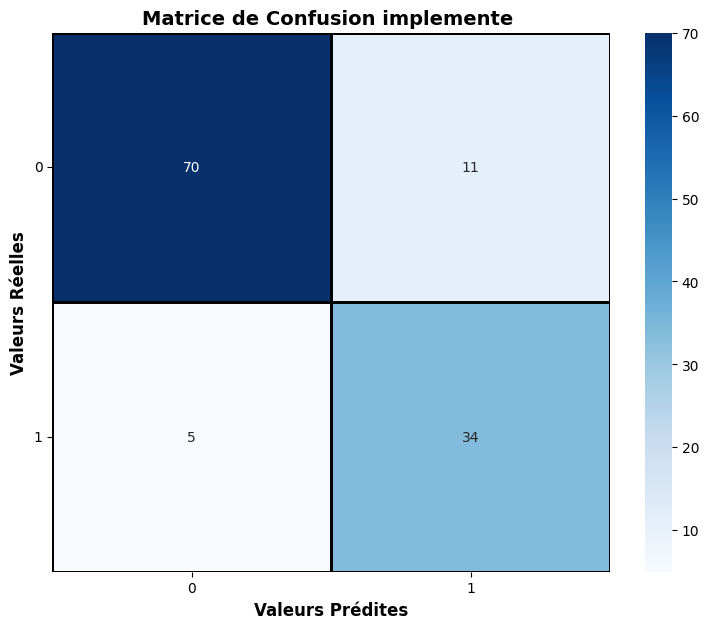

Recall de la classe 0: 0.86
Recall de la classe 1: 0.87
Précision de la classe 0: 0.93
Précision de la classe 1: 0.76
false positive rate de la classe 0: 0.13
false positive rate de la classe 1: 0.14
specificity  de la classe 0: 0.87
specificity  de la classe 1: 0.86
[[70 11]
 [ 5 34]]
Accuracy: 0.8666666666666667
Recall: 0.8679962013295346
Precision: 0.8444444444444444
False Positive Rate: 0.13200379867046533
Specificity: 0.8679962013295346
------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------
K = 1:


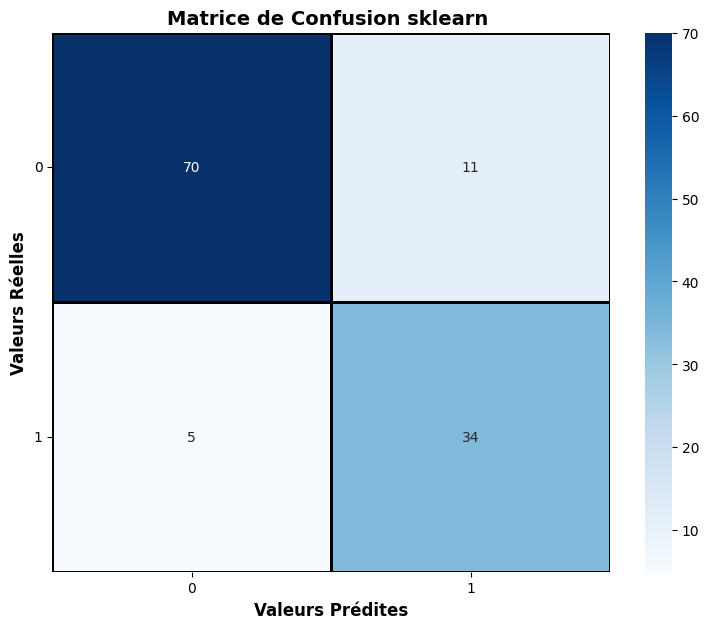

[[70 11]
 [ 5 34]]
Accuracy sklearn: 0.8666666666666667
Recall  sklearn: 0.8679962013295346
Precision  sklearn: 0.8444444444444444
False Positive Rate  sklearn: 0.0707618667730355
Specificity  sklearn: 0.9292381332269646
-------------------- Courbe ROC sklearn pour classification binaire --------------------


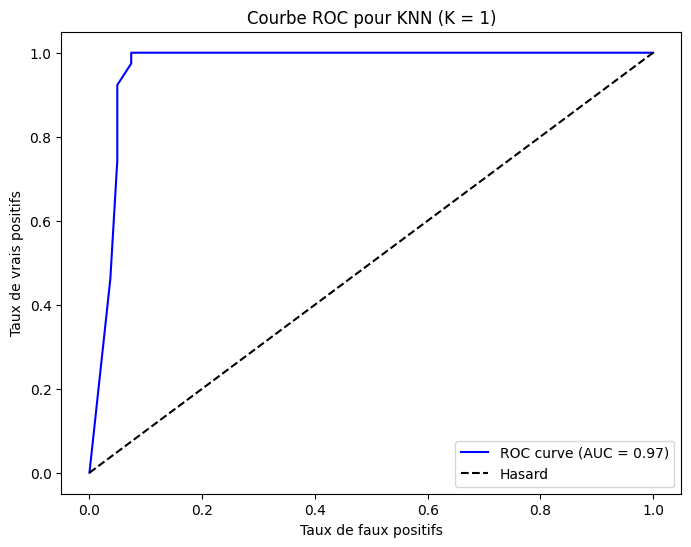

------------------------------------------------Courbe ROC implemente----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_5512\2404480383.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)


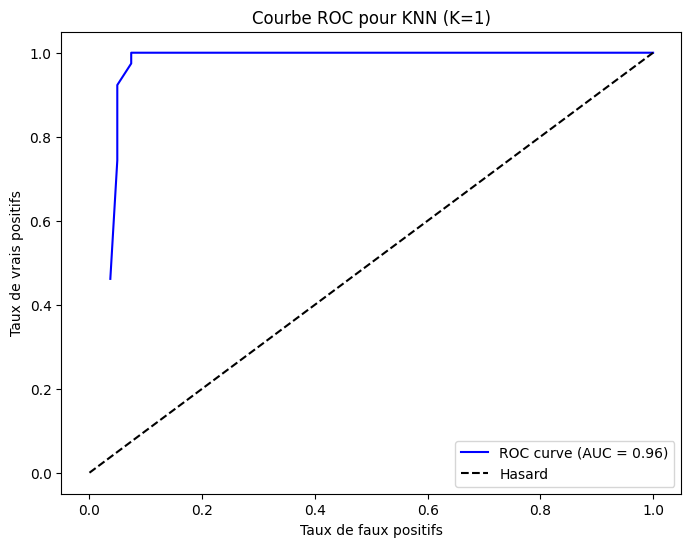

------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------
K = 3:


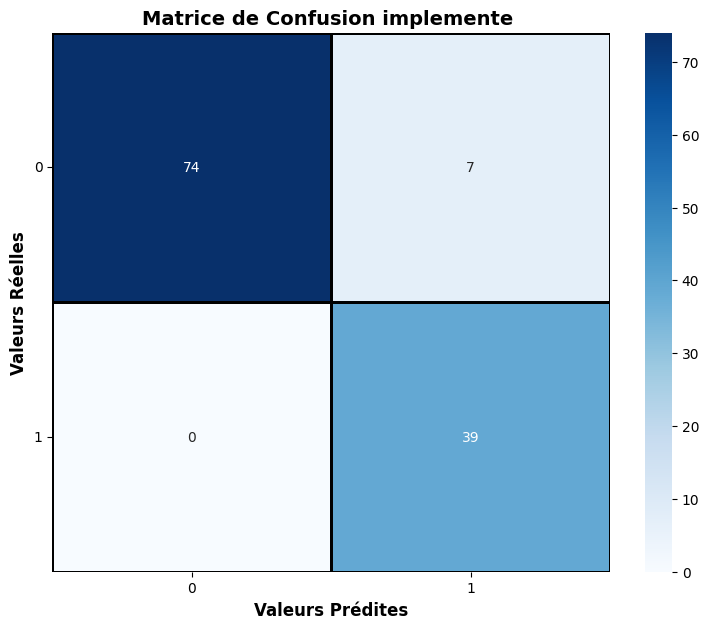

Recall de la classe 0: 0.91
Recall de la classe 1: 1.00
Précision de la classe 0: 1.00
Précision de la classe 1: 0.85
false positive rate de la classe 0: 0.00
false positive rate de la classe 1: 0.09
specificity  de la classe 0: 1.00
specificity  de la classe 1: 0.91
[[74  7]
 [ 0 39]]
Accuracy: 0.9416666666666667
Recall: 0.9567901234567902
Precision: 0.9239130434782609
False Positive Rate: 0.043209876543209874
Specificity: 0.9567901234567902
------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------
K = 3:


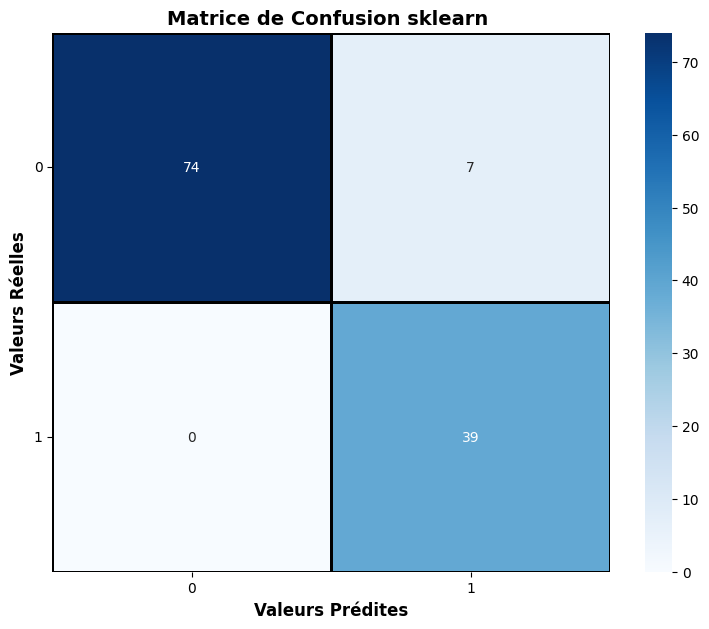

[[74  7]
 [ 0 39]]
Accuracy sklearn: 0.9416666666666667
Recall  sklearn: 0.9567901234567902
Precision  sklearn: 0.9239130434782609
False Positive Rate  sklearn: 0.029166666666666667
Specificity  sklearn: 0.9708333333333333
-------------------- Courbe ROC sklearn pour classification binaire --------------------


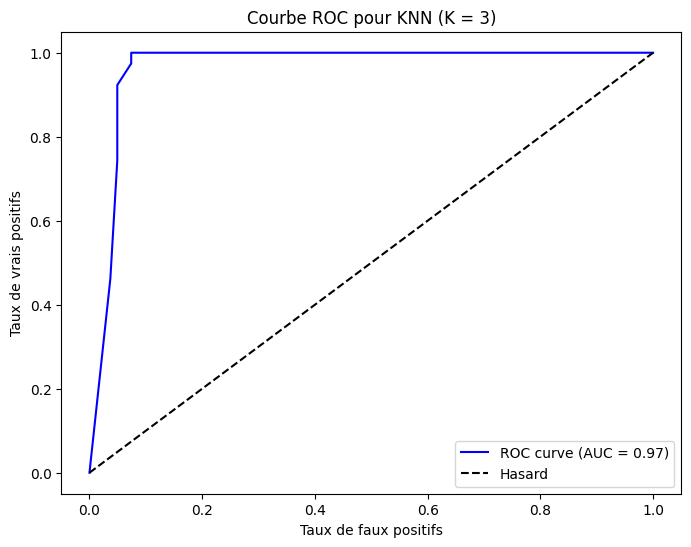

------------------------------------------------Courbe ROC implemente----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_5512\2404480383.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)


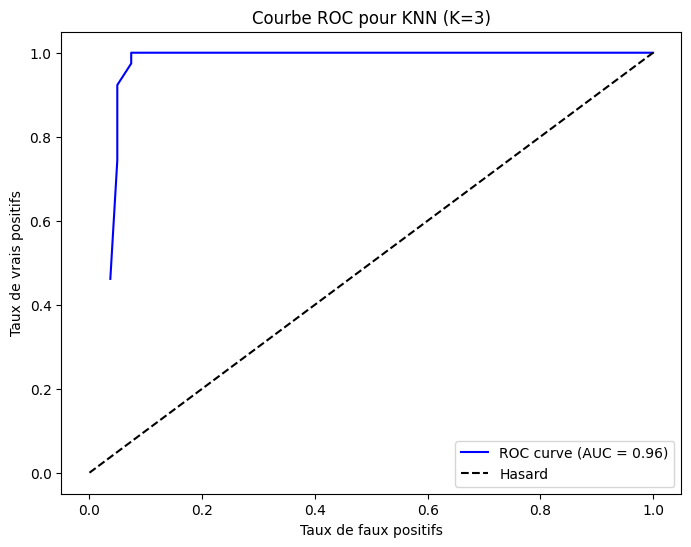

------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------
K = 5:


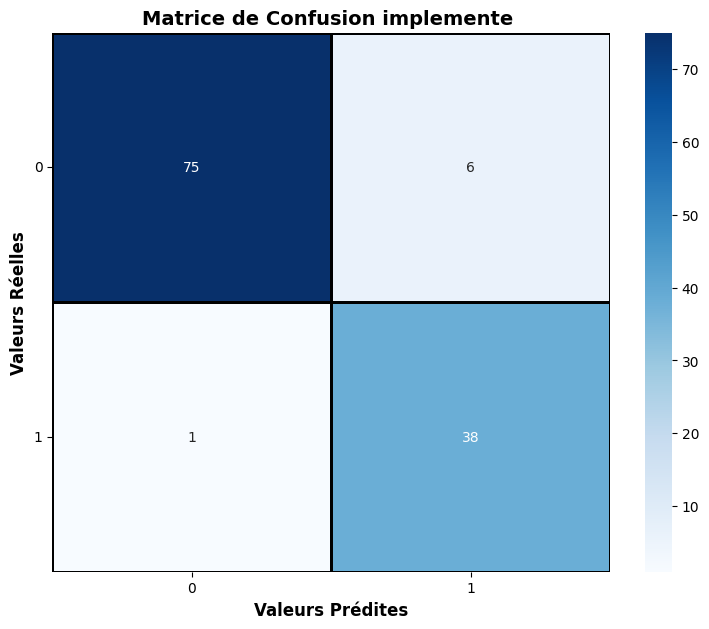

Recall de la classe 0: 0.93
Recall de la classe 1: 0.97
Précision de la classe 0: 0.99
Précision de la classe 1: 0.86
false positive rate de la classe 0: 0.03
false positive rate de la classe 1: 0.07
specificity  de la classe 0: 0.97
specificity  de la classe 1: 0.93
[[75  6]
 [ 1 38]]
Accuracy: 0.9416666666666667
Recall: 0.9501424501424501
Precision: 0.9252392344497608
False Positive Rate: 0.04985754985754985
Specificity: 0.9501424501424501
------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------
K = 5:


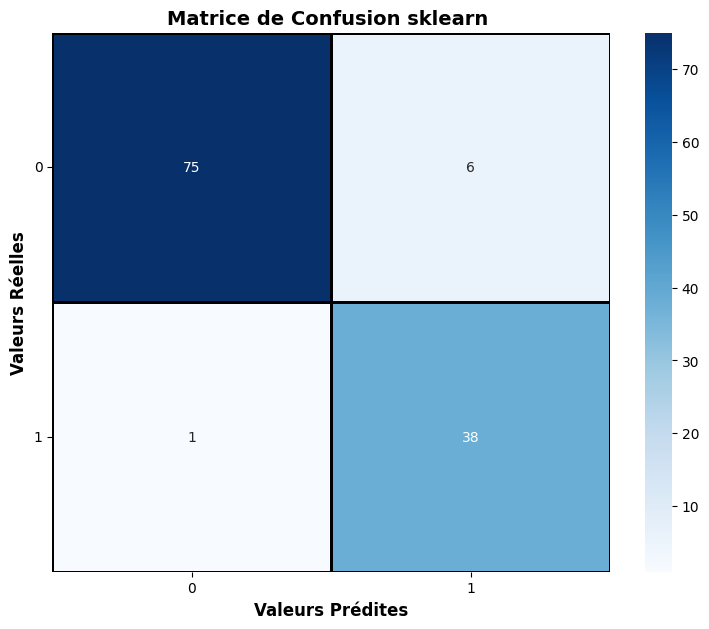

[[75  6]
 [ 1 38]]
Accuracy sklearn: 0.9416666666666667
Recall  sklearn: 0.9501424501424501
Precision  sklearn: 0.9252392344497608
False Positive Rate  sklearn: 0.029596048945894148
Specificity  sklearn: 0.9704039510541058
-------------------- Courbe ROC sklearn pour classification binaire --------------------


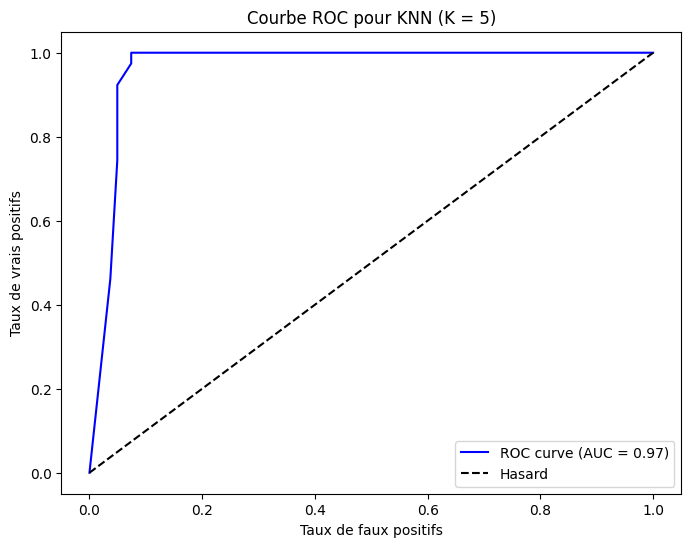

------------------------------------------------Courbe ROC implemente----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_5512\2404480383.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)


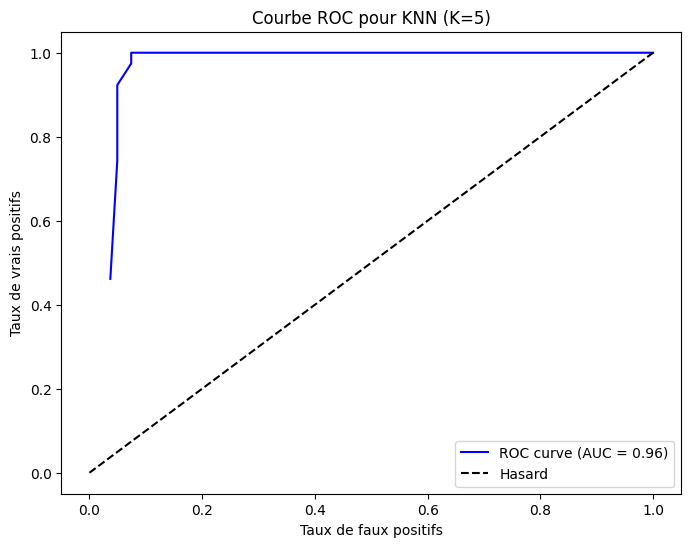

------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------
K = 7:


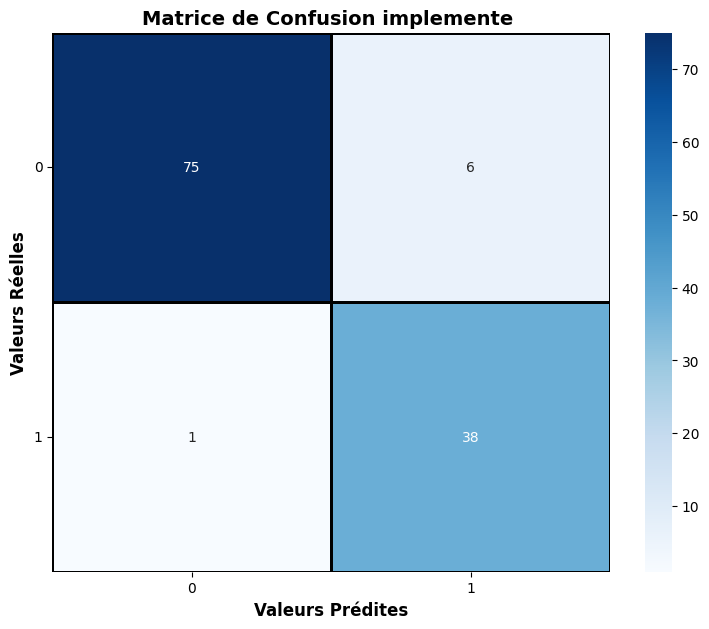

Recall de la classe 0: 0.93
Recall de la classe 1: 0.97
Précision de la classe 0: 0.99
Précision de la classe 1: 0.86
false positive rate de la classe 0: 0.03
false positive rate de la classe 1: 0.07
specificity  de la classe 0: 0.97
specificity  de la classe 1: 0.93
[[75  6]
 [ 1 38]]
Accuracy: 0.9416666666666667
Recall: 0.9501424501424501
Precision: 0.9252392344497608
False Positive Rate: 0.04985754985754985
Specificity: 0.9501424501424501
------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------
K = 7:


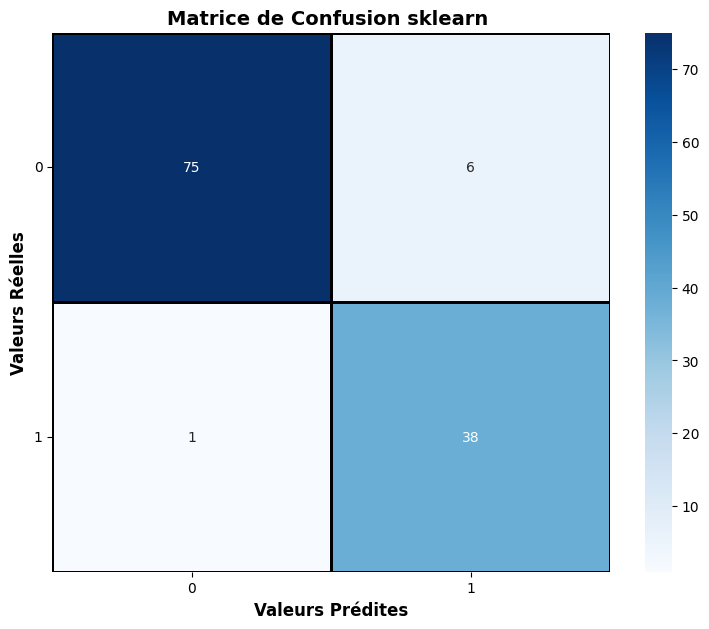

[[75  6]
 [ 1 38]]
Accuracy sklearn: 0.9416666666666667
Recall  sklearn: 0.9501424501424501
Precision  sklearn: 0.9252392344497608
False Positive Rate  sklearn: 0.029596048945894148
Specificity  sklearn: 0.9704039510541058
-------------------- Courbe ROC sklearn pour classification binaire --------------------


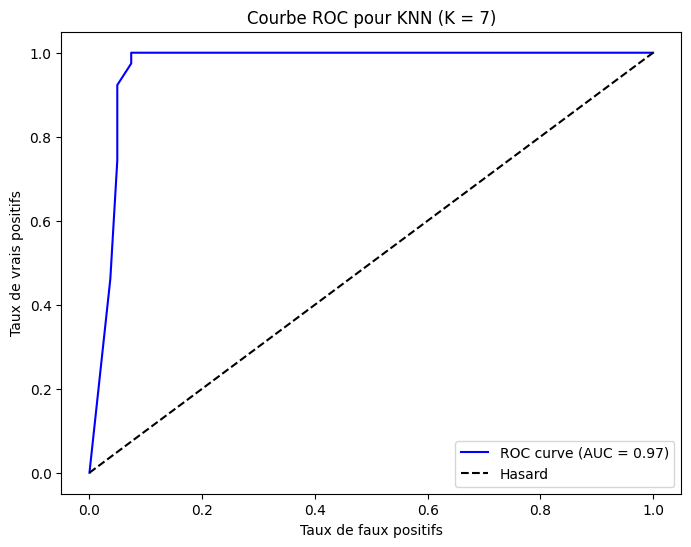

------------------------------------------------Courbe ROC implemente----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_5512\2404480383.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)


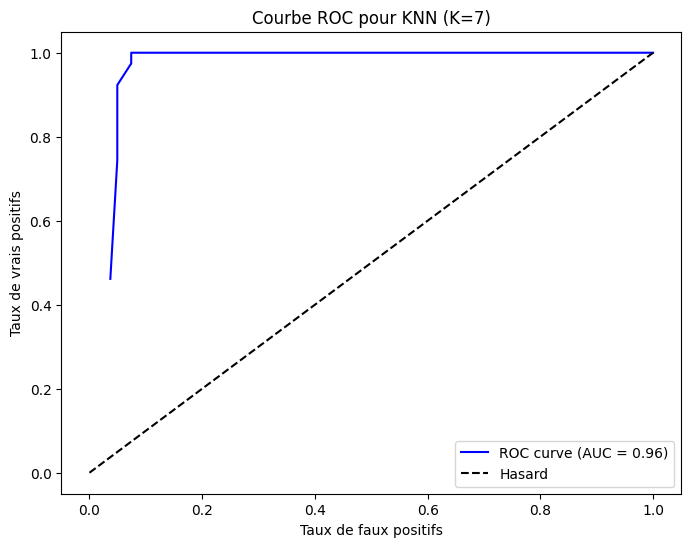

In [39]:
# Définition de la fonction de distance euclidienne
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

# Définition de l'algorithme KNN
# Définition de l'algorithme KNN
def k_nearest_neighbors(Xt, Yt, Xtt, k):
    predictions = []
    for test_point in Xtt:
        # Calcul des distances entre le point de test et tous les points dans l'ensemble de données d'entraînement
        distances = [euclidean_distance(test_point, train_point) for train_point in Xt]
        # Obtenir les indices des K plus proches voisins
        nearest_indices = np.argsort(distances)[:k]
        # Obtenir les étiquettes des K plus proches voisins
        nearest_labels = [Yt.iloc[i] for i in nearest_indices]
        # Prédire l'étiquette en effectuant un vote majoritaire parmi les étiquettes des voisins
        predicted_label = max(set(nearest_labels), key=nearest_labels.count)
        predictions.append(predicted_label)
    return predictions

# Tester différentes valeurs de k et évaluer les performances du modèle
K_values = [1, 3, 5, 7]  # Valeurs de k à tester


# Valeur de k à tester
K_values = [1, 3, 5, 7]

# Tester différentes valeurs de k et évaluer les performances du modèle
for k in K_values:
    # Prédire les étiquettes pour les données de test
    y_pred = k_nearest_neighbors(Xt, Yt, Xtt, k)
    # Calculer les métriques de performance
    print("------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------")
    print(f"K = {k}:")
    conf_matrix_imp = confusion_matrix_imp(Ytt, y_pred)

    labels = [0,1]
    plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion implemente ")


    acc = accuracy_score_imp(Ytt, y_pred)
   
    recall = recall_score_imp(Ytt, y_pred)
 
    
    precision = precision_score_imp(Ytt, y_pred,labels)  # Étiquette positive pour le chiffre 0

    
    fpr = false_positive_rate_imp(Ytt, y_pred, labels)  # Étiquette positive pour le chiffre 0
    specificity = specificity_score_imp(Ytt, y_pred, labels)  # Étiquette négative pour le chiffre 0
#     roc_fpr, roc_tpr = roc_curve(Ytt, y_pred, positive_label=10)  # Étiquette positive pour le chiffre 0
    
   
    
    print(conf_matrix_imp)
    print(f"Accuracy: {acc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"False Positive Rate: {fpr}")
    print(f"Specificity: {specificity}")

   
    print("------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------")
    print(f"K = {k}:")
    conf_matrix = confusion_matrix(Ytt, y_pred)
    plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion sklearn ")
    
    accuracy_sklearn = accuracy_score(Ytt, y_pred)
    precision_sklearn = precision_score(Ytt, y_pred,average="macro")  # Étiquette positive pour le chiffre 0
    recall_sklearn = recall_score(Ytt, y_pred,average="macro")

    fpr_sklearn  = false_positive_rate_sklearn(Ytt, y_pred)  # Étiquette positive pour le chiffre 0

    specificity_sklearn  = specificity_score_sklearn(Ytt, y_pred)  # Étiquette négative pour le chiffre 0"""
    print(conf_matrix)

    print(f"Accuracy sklearn: { accuracy_sklearn}")
    print(f"Recall  sklearn: {recall_sklearn}")
    print(f"Precision  sklearn: {precision_sklearn}")
    print(f"False Positive Rate  sklearn: {fpr_sklearn}")
    print(f"Specificity  sklearn: {specificity_sklearn}")
   
    
    print("-------------------- Courbe ROC sklearn pour classification binaire --------------------")

    # Prédiction des probabilités pour la classe positive (classe 1)
    y_score = knn_model.predict_proba(Xtt)[:, 1]  # On ne garde que la colonne pour la classe 1

    # Binarisation des étiquettes (Ytt doit être binaire, 0 ou 1)
    classes = np.unique(Ytt)
    assert len(classes) == 2, "Le dataset doit être binaire (deux classes seulement)."

    # Calcul de la courbe ROC
    fpr, tpr, _ = roc_curve(Ytt, y_score)
    roc_auc = auc(fpr, tpr)

    # Affichage de la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Hasard')  # Courbe de référence
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f"Courbe ROC pour KNN (K = {k})")
    plt.legend(loc="lower right")
    plt.show()
    print("------------------------------------------------Courbe ROC implemente----------------------------------------------------")
    y_score = knn_model.predict_proba(Xtt)[:, 1]
    fpr, tpr = roc_curve_imp(Ytt, y_score)
    roc_auc = auc_imp(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Hasard')
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f"Courbe ROC pour KNN (K={k})")
    plt.legend(loc="lower right")
    plt.show()
 
  
    

In [40]:
y_pred

[np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.in

# Méthode 1: MVS


SVM:
------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------


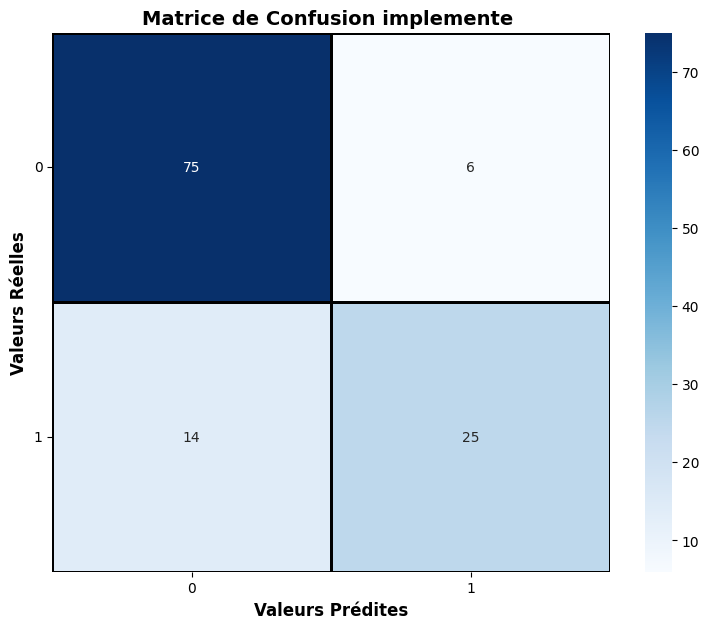

Recall de la classe 0: 0.93
Recall de la classe 1: 0.64
Précision de la classe 0: 0.84
Précision de la classe 1: 0.81
false positive rate de la classe 0: 0.36
false positive rate de la classe 1: 0.07
specificity  de la classe 0: 0.64
specificity  de la classe 1: 0.93
[[75  6]
 [14 25]]
Accuracy: 0.8333333333333334
Recall: 0.7834757834757835
Precision: 0.8245741210583544
False Positive Rate: 0.21652421652421652
Specificity: 0.7834757834757835
------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------


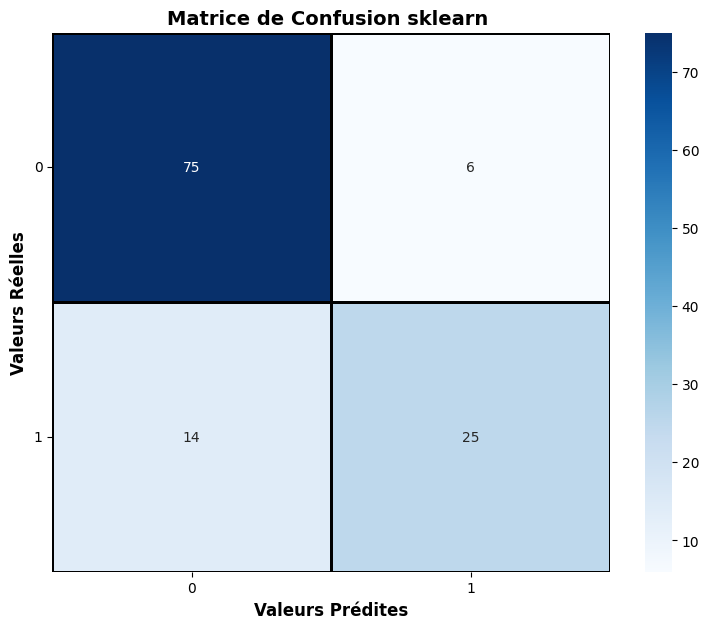

[[75  6]
 [14 25]]
Accuracy sklearn: 0.8333333333333334
Recall  sklearn: 0.7834757834757835
Precision  sklearn: 0.8245741210583544
False Positive Rate  sklearn: 0.08970539556438265
Specificity  sklearn: 0.9102946044356173
-------------------- Courbe ROC sklearn pour classification binaire --------------------


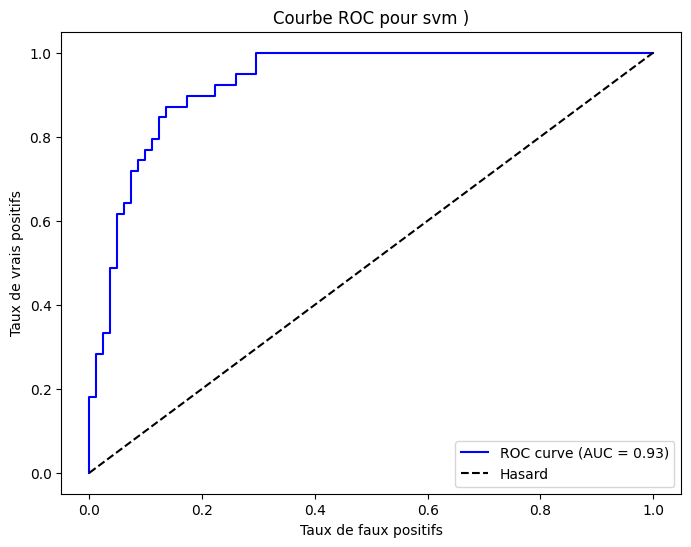

------------------------------------------------Courbe ROC implemente----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_5512\2404480383.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)


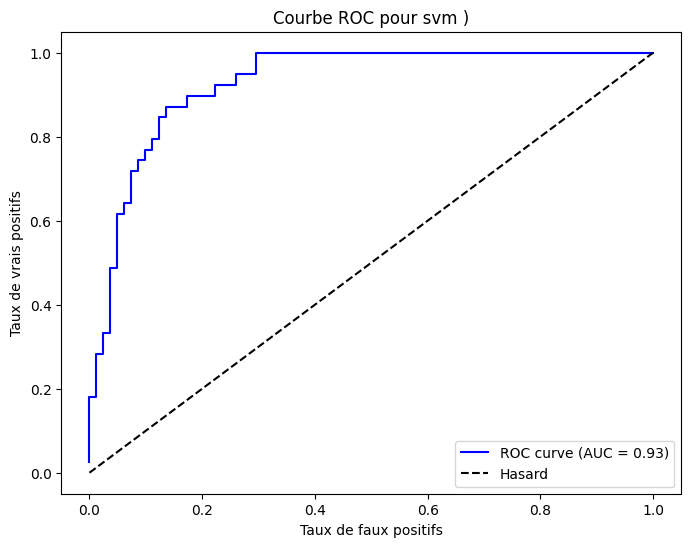

In [48]:
# Création du modèle SVM avec un noyau linéaire
model = svm.SVC(kernel='linear', probability=True)  

# Entrainement du modèle sur les données d'entrainement
model.fit(Xt, Yt)

# Prédiction des étiquettes sur les données de test
y_pred = model.predict(Xtt)

# Calcul des métriques de performance

# Affichage des résultats
print("SVM:")
print("------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------")

conf_matrix_imp = confusion_matrix_imp(Ytt, y_pred)

labels = [0,1]
plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion implemente ")


acc = accuracy_score_imp(Ytt, y_pred)
   
recall = recall_score_imp(Ytt, y_pred)
 
    
precision = precision_score_imp(Ytt, y_pred,labels)  # Étiquette positive pour le chiffre 0

    
fpr = false_positive_rate_imp(Ytt, y_pred, labels)  # Étiquette positive pour le chiffre 0
specificity = specificity_score_imp(Ytt, y_pred, labels)  # Étiquette négative pour le chiffre 0
#     roc_fpr, roc_tpr = roc_curve(Ytt, y_pred, positive_label=10)  # Étiquette positive pour le chiffre 0
    
   
    
print(conf_matrix_imp)
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"False Positive Rate: {fpr}")
print(f"Specificity: {specificity}")


print("------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------")
conf_matrix = confusion_matrix(Ytt, y_pred)
plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion sklearn ")
    
accuracy_sklearn = accuracy_score(Ytt, y_pred)
precision_sklearn = precision_score(Ytt, y_pred,average="macro")  # Étiquette positive pour le chiffre 0
recall_sklearn = recall_score(Ytt, y_pred,average="macro")

fpr_sklearn  = false_positive_rate_sklearn(Ytt, y_pred)  # Étiquette positive pour le chiffre 0

specificity_sklearn  = specificity_score_sklearn(Ytt, y_pred)  # Étiquette négative pour le chiffre 0"""
print(conf_matrix)

print(f"Accuracy sklearn: { accuracy_sklearn}")
print(f"Recall  sklearn: {recall_sklearn}")
print(f"Precision  sklearn: {precision_sklearn}")
print(f"False Positive Rate  sklearn: {fpr_sklearn}")
print(f"Specificity  sklearn: {specificity_sklearn}") 
print("-------------------- Courbe ROC sklearn pour classification binaire --------------------")

# Prédiction des probabilités pour la classe positive (classe 1)
y_score = model.predict_proba(Xtt)[:, 1]  # On ne garde que la colonne pour la classe 1

# Binarisation des étiquettes (Ytt doit être binaire, 0 ou 1)
classes = np.unique(Ytt)
assert len(classes) == 2, "Le dataset doit être binaire (deux classes seulement)."

# Calcul de la courbe ROC
fpr, tpr, _ = roc_curve(Ytt, y_score)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Hasard')  # Courbe de référence
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f"Courbe ROC pour svm )")
plt.legend(loc="lower right")
plt.show()
print("------------------------------------------------Courbe ROC implemente----------------------------------------------------")
y_score = model.predict_proba(Xtt)[:, 1]
fpr, tpr = roc_curve_imp(Ytt, y_score)
roc_auc = auc_imp(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Hasard')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f"Courbe ROC pour svm )")
plt.legend(loc="lower right")
plt.show()

    


      

In [49]:
y_pred 

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

# Méthode 2: DecisionTree

Decision Tree:
------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------


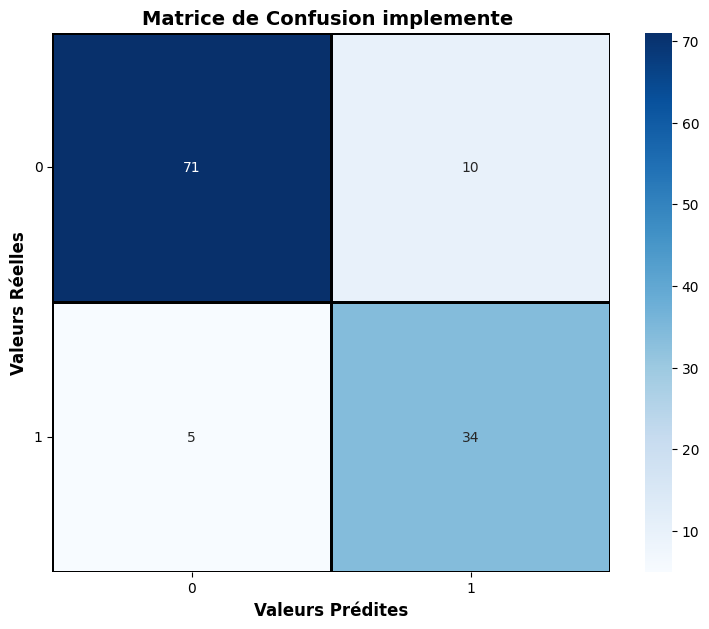

Recall de la classe 0: 0.88
Recall de la classe 1: 0.87
Précision de la classe 0: 0.93
Précision de la classe 1: 0.77
false positive rate de la classe 0: 0.13
false positive rate de la classe 1: 0.12
specificity  de la classe 0: 0.87
specificity  de la classe 1: 0.88
[[71 10]
 [ 5 34]]
Accuracy: 0.875
Recall: 0.8741690408357075
Precision: 0.8534688995215312
False Positive Rate: 0.1258309591642925
Specificity: 0.8741690408357075
------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------


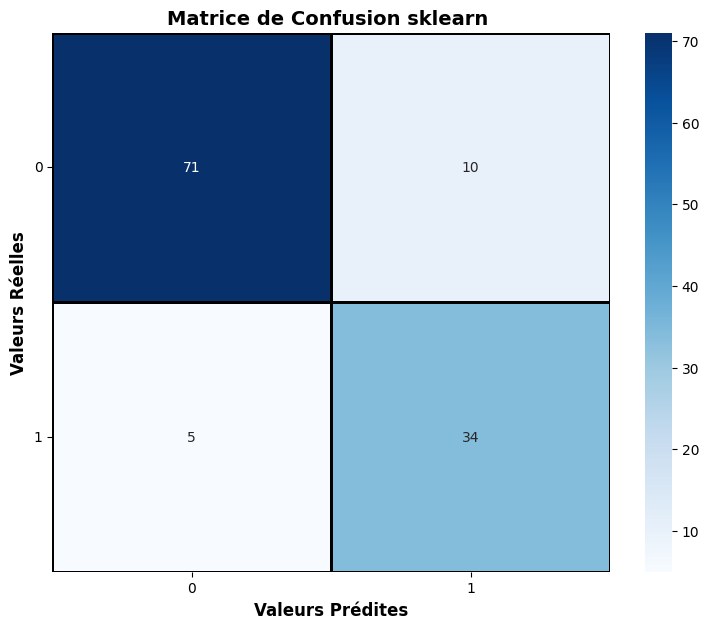

[[71 10]
 [ 5 34]]
Accuracy sklearn: 0.875
Recall  sklearn: 0.8741690408357075
Precision  sklearn: 0.8534688995215312
False Positive Rate  sklearn: 0.06620553359683795
Specificity  sklearn: 0.9337944664031621
-------------------- Courbe ROC sklearn pour classification binaire --------------------


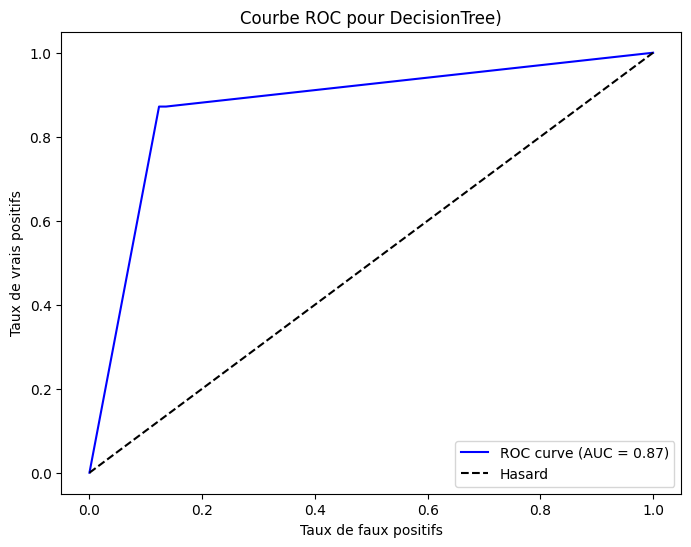

------------------------------------------------Courbe ROC implemente----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_5512\2404480383.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)


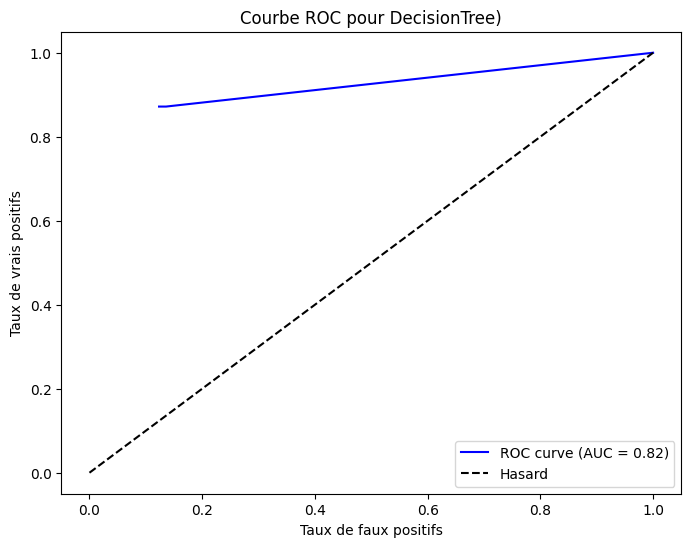

In [50]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(Xt, Yt)
y_pred = model.predict(Xtt)

# Affichage des résultats
print("Decision Tree:")
print("------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------")

conf_matrix_imp = confusion_matrix_imp(Ytt, y_pred)

labels = [0,1]
plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion implemente ")

acc = accuracy_score_imp(Ytt, y_pred)
   
recall = recall_score_imp(Ytt, y_pred)
 
    
precision = precision_score_imp(Ytt, y_pred,labels)  # Étiquette positive pour le chiffre 0

    
fpr = false_positive_rate_imp(Ytt, y_pred, labels)  # Étiquette positive pour le chiffre 0
specificity = specificity_score_imp(Ytt, y_pred, labels)  # Étiquette négative pour le chiffre 0
# roc_fpr, roc_tpr = roc_curve(Ytt, y_pred, positive_label=10)  # Étiquette positive pour le chiffre 0
    
print(conf_matrix_imp)
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"False Positive Rate: {fpr}")
print(f"Specificity: {specificity}")


print("------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------")
conf_matrix = confusion_matrix(Ytt, y_pred)
plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion sklearn ")
    
accuracy_sklearn = accuracy_score(Ytt, y_pred)
precision_sklearn = precision_score(Ytt, y_pred,average="macro")  # Étiquette positive pour le chiffre 0
recall_sklearn = recall_score(Ytt, y_pred,average="macro")

fpr_sklearn  = false_positive_rate_sklearn(Ytt, y_pred)  # Étiquette positive pour le chiffre 0

specificity_sklearn  = specificity_score_sklearn(Ytt, y_pred)  # Étiquette négative pour le chiffre 0"""
print(conf_matrix)

print(f"Accuracy sklearn: { accuracy_sklearn}")
print(f"Recall  sklearn: {recall_sklearn}")
print(f"Precision  sklearn: {precision_sklearn}")
print(f"False Positive Rate  sklearn: {fpr_sklearn}")
print(f"Specificity  sklearn: {specificity_sklearn}")
   
print("-------------------- Courbe ROC sklearn pour classification binaire --------------------")

# Prédiction des probabilités pour la classe positive (classe 1)
y_score = model.predict_proba(Xtt)[:, 1]  # On ne garde que la colonne pour la classe 1

# Binarisation des étiquettes (Ytt doit être binaire, 0 ou 1)
classes = np.unique(Ytt)
assert len(classes) == 2, "Le dataset doit être binaire (deux classes seulement)."

# Calcul de la courbe ROC
fpr, tpr, _ = roc_curve(Ytt, y_score)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Hasard')  # Courbe de référence
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f"Courbe ROC pour DecisionTree)")
plt.legend(loc="lower right")
plt.show()
print("------------------------------------------------Courbe ROC implemente----------------------------------------------------")
y_score = model.predict_proba(Xtt)[:, 1]
fpr, tpr = roc_curve_imp(Ytt, y_score)
roc_auc = auc_imp(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Hasard')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f"Courbe ROC pour DecisionTree)")
plt.legend(loc="lower right")
plt.show()


In [51]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

# Méthode 3: RN
Réseaux de neurones Perceptron

MLP:
------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------


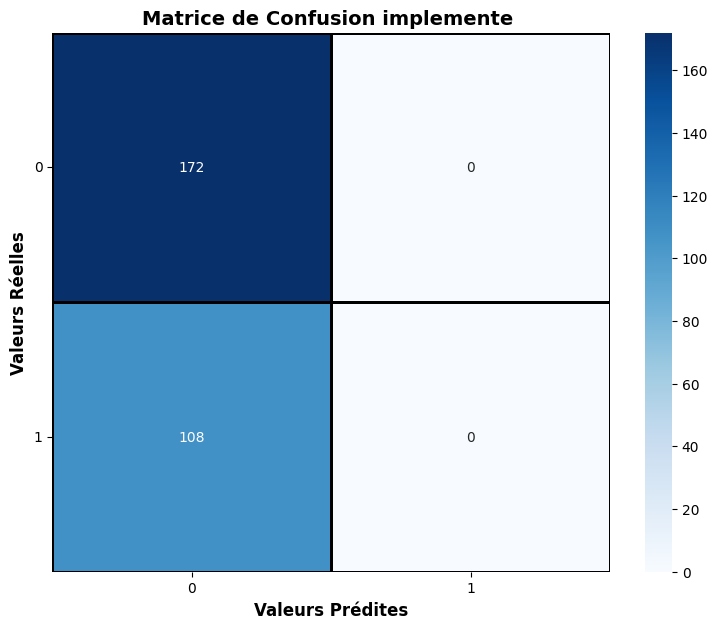

Recall de la classe 0: 1.00
Recall de la classe 1: 0.00
Précision de la classe 0: 0.61
Précision de la classe 1: 0.00
false positive rate de la classe 0: 1.00
false positive rate de la classe 1: 0.00
specificity  de la classe 0: 0.00
specificity  de la classe 1: 1.00
[[172   0]
 [108   0]]
Accuracy: 0.6142857142857143
Recall: 0.5
Precision: 0.30714285714285716
False Positive Rate: 0.5
Specificity: 0.5
------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------


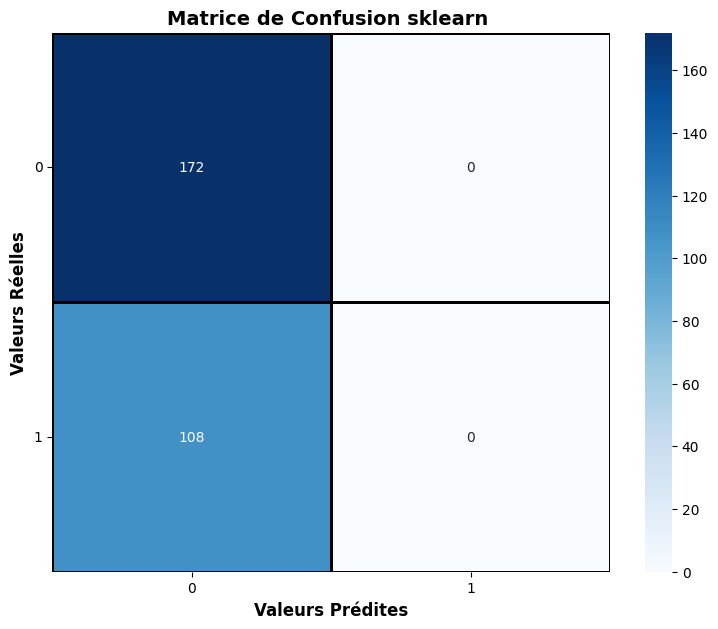

c:\Users\HERO-INFO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[172   0]
 [108   0]]
Accuracy sklearn: 0.6142857142857143
Recall  sklearn: 0.5
Precision  sklearn: 0.30714285714285716
False Positive Rate  sklearn: 0.19285714285714287
Specificity  sklearn: 0.8071428571428572
-------------------- Courbe ROC sklearn pour classification binaire --------------------


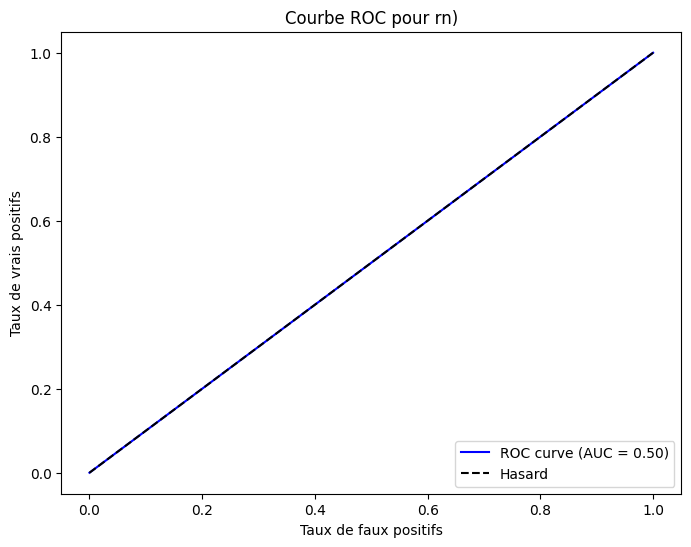

------------------------------------------------Courbe ROC implemente----------------------------------------------------


C:\Users\HERO-INFO\AppData\Local\Temp\ipykernel_5512\2404480383.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)


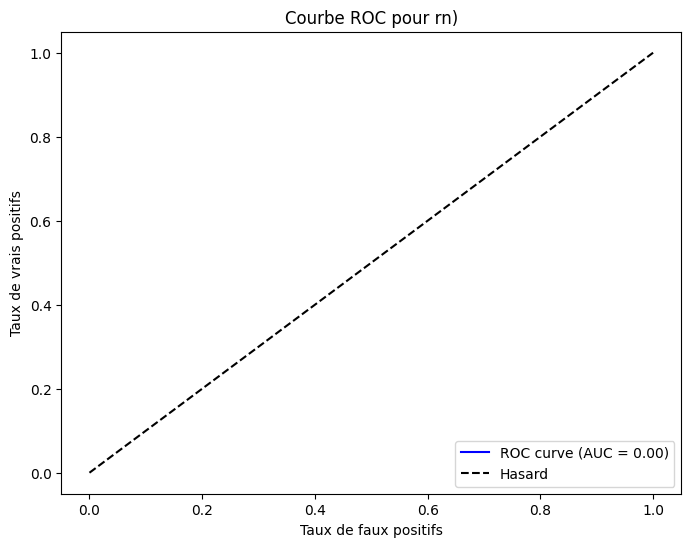

In [53]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(Xt, Yt)


model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25), max_iter=100000)
model.fit(Xt, Yt)
y_pred = model.predict(Xtt)

# Calcul des métriques de performance
# Affichage des résultats
print("MLP:")
print("------------------------------------------------Afficher les résultats implémenté-----------------------------------------------------")

conf_matrix_imp = confusion_matrix_imp(Ytt, y_pred)

labels = [0,1]
plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion implemente ")


acc = accuracy_score_imp(Ytt, y_pred)
   
recall = recall_score_imp(Ytt, y_pred)
 
    
precision = precision_score_imp(Ytt, y_pred,labels)  # Étiquette positive pour le chiffre 0

    
fpr = false_positive_rate_imp(Ytt, y_pred, labels)  # Étiquette positive pour le chiffre 0
specificity = specificity_score_imp(Ytt, y_pred, labels)  # Étiquette négative pour le chiffre 0
#     roc_fpr, roc_tpr = roc_curve(Ytt, y_pred, positive_label=10)  # Étiquette positive pour le chiffre 0
    
   
    
print(conf_matrix_imp)
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"False Positive Rate: {fpr}")
print(f"Specificity: {specificity}")


print("------------------------------------------------Afficher les résultats sklearn-----------------------------------------------------")
conf_matrix = confusion_matrix(Ytt, y_pred)
plot_confusion_matrix(conf_matrix_imp, labels, title="Matrice de Confusion sklearn ")
    
accuracy_sklearn = accuracy_score(Ytt, y_pred)
precision_sklearn = precision_score(Ytt, y_pred,average="macro")  # Étiquette positive pour le chiffre 0
recall_sklearn = recall_score(Ytt, y_pred,average="macro")

fpr_sklearn  = false_positive_rate_sklearn(Ytt, y_pred)  # Étiquette positive pour le chiffre 0

specificity_sklearn  = specificity_score_sklearn(Ytt, y_pred)  # Étiquette négative pour le chiffre 0"""
print(conf_matrix)

print(f"Accuracy sklearn: { accuracy_sklearn}")
print(f"Recall  sklearn: {recall_sklearn}")
print(f"Precision  sklearn: {precision_sklearn}")
print(f"False Positive Rate  sklearn: {fpr_sklearn}")
print(f"Specificity  sklearn: {specificity_sklearn}")

print("-------------------- Courbe ROC sklearn pour classification binaire --------------------")

# Prédiction des probabilités pour la classe positive (classe 1)
y_score = model.predict_proba(Xtt)[:, 1]  # On ne garde que la colonne pour la classe 1

# Binarisation des étiquettes (Ytt doit être binaire, 0 ou 1)
classes = np.unique(Ytt)
assert len(classes) == 2, "Le dataset doit être binaire (deux classes seulement)."

# Calcul de la courbe ROC
fpr, tpr, _ = roc_curve(Ytt, y_score)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Hasard')  # Courbe de référence
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f"Courbe ROC pour rn)")
plt.legend(loc="lower right")
plt.show()
print("------------------------------------------------Courbe ROC implemente----------------------------------------------------")
y_score = model.predict_proba(Xtt)[:, 1]
fpr, tpr = roc_curve_imp(Ytt, y_score)
roc_auc = auc_imp(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Hasard')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f"Courbe ROC pour rn)")
plt.legend(loc="lower right")
plt.show()


In [54]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Méthode 4: RNC
Réseaux de Neurones Convolutifs

# Appliquer les métriques implementées pour voir le résultat